## Dhairya Kothari
## PEX Machine Learning challenge

### Part 2 - Classification of the Images

I decided to use Keras package to trian a CNN on the Images. I use keras for its ease to work with. I can feed the images directly from the respective folder. My approach is to store images in its folder for training data which will have 2 sub-directories namely 'Indoor' and 'Outdoor' and the images stored respectively while the directories work as a label for the same. 

In [153]:
import warnings 
warnings.filterwarnings('ignore')

from keras import backend
from keras import optimizers
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator

from pprint import pprint
from skimage.measure import block_reduce
from matplotlib import pyplot as plt
%matplotlib inline

import glob
import os
import numpy as np
from keras.preprocessing import image

#### Defining the image dimensions and directories, also defining other parameters

Chose the image size of 160x90 pixels to maintain the aspect ratio and also reduce the complexity of the training images by a big factor 

In [154]:
# dimensions of our images.
img_w, img_h = 90, 160

tr_dir = 'data/train_data'
val_dir = 'data/val_data'

tr_sample_N = len(glob.glob('./data/train_data/*/*.jpg'))
val_sample_N = len(glob.glob('./data/val_data/*/*.jpg'))

epochs = 24
batch_size = 32

In [155]:
if backend.image_data_format() == 'channels_first':
    input_shape = (3, img_w, img_h)
else:
    input_shape = (img_w, img_h, 3)

Defining all the model parameters, layers, optimization and loss function

#### Explaining the choice of model parameters:

<p>
We initialise our neural network model as a sequential network. Then we use 2 convoluted layers with different filters increasing in number after each layer followed by Maxpooling. In pooling, We take a matrix where we’ll have a balance between minimal pixel loss, getting a precise region where the feature are located and complexity of the network. Everything is self explainatory.
<p>
All the parameters are chosen (after multiple trial and errors) such that it is a sweet spot between complexity, model performance and training time. At one instance a fully featured (some what extra) model had an ETA of 76 hrs.

<u>We use 2 activation functions</u>- <br>

<b>ReLu:</b><br>
The usefulness of ReLu not only it is a very simple activation, it also prevents gradients from saturating. ReLu may amplify the signal inside the network more than other activation which in our case might help with the prediction. But, ReLu also tends to overfit according to some literature, to overcome that we use drop out.<br>
Hence we use relu for all the layers except the last.
<br>

<b>Sigmoid:</b> <br>
As Sigmoid activation function in the output layer polishes the classification (for binary classification) 
<br>

<b>Optimizer:</b><br>
Adamax optimizer is a variant of Adam. Lr is the Learning rate. While, beta_1 is the exponential decay rate for the 1st moment estimates and beta_2 for the 2nd moment estimates.



In [156]:
model = Sequential()
model.add(Conv2D(filters=8, kernel_size=3, activation='relu', input_shape=input_shape))
model.add(Conv2D(filters=16, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))

model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

Adamax = optimizers.Adamax(lr=0.00001, beta_1 = 0.9, beta_2 = 0.99)
model.compile(optimizer='Adamax', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 88, 158, 8)        224       
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 86, 156, 16)       1168      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 43, 78, 16)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 41, 76, 32)        4640      
_________________________________________________________________
flatten_11 (Flatten)         (None, 99712)             0         
_________________________________________________________________
dense_29 (Dense)             (None, 16)                1595408   
_________________________________________________________________
dropout_15 (Dropout)         (None, 16)                0         
__________

Preparing the data train and validation data

In [157]:
train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
train_generator = train_datagen.flow_from_directory(tr_dir,
                                                    target_size=(img_w, img_h),
                                                    batch_size=batch_size,
                                                    class_mode='binary')

test_datagen = ImageDataGenerator(rescale=1. / 255)
validation_generator = test_datagen.flow_from_directory(val_dir,
                                                        target_size=(img_w, img_h),
                                                        batch_size=batch_size,
                                                        class_mode='binary')

Found 1255 images belonging to 2 classes.
Found 309 images belonging to 2 classes.


#### Fitting the model and also saving the weights for the future use so we can start from where we left off

In [158]:
model.fit_generator(train_generator,
                    steps_per_epoch=tr_sample_N // batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=validation_generator,
                    validation_steps=val_sample_N // batch_size)

Epoch 1/24
39/39 [==============================] - 55s 1s/step - loss: 0.9221 - acc: 0.5478 - val_loss: 0.6377 - val_acc: 0.6250
Epoch 2/24
39/39 [==============================] - 69s 2s/step - loss: 0.6333 - acc: 0.6429 - val_loss: 0.5734 - val_acc: 0.8056
Epoch 3/24
39/39 [==============================] - 71s 2s/step - loss: 0.6186 - acc: 0.6549 - val_loss: 0.5703 - val_acc: 0.8715
Epoch 4/24
39/39 [==============================] - 74s 2s/step - loss: 0.6116 - acc: 0.6545 - val_loss: 0.5864 - val_acc: 0.7569
Epoch 5/24
39/39 [==============================] - 75s 2s/step - loss: 0.5839 - acc: 0.6858 - val_loss: 0.5542 - val_acc: 0.8542
Epoch 6/24
39/39 [==============================] - 75s 2s/step - loss: 0.5831 - acc: 0.6942 - val_loss: 0.5158 - val_acc: 0.7917
Epoch 7/24
39/39 [==============================] - 77s 2s/step - loss: 0.5378 - acc: 0.7732 - val_loss: 0.4977 - val_acc: 0.9097
Epoch 8/24
39/39 [==============================] - 76s 2s/step - loss: 0.5413 - acc: 0.76

Saving model parameters

In [ ]:
try:
    if not os.path.exists('./saved_feat'):
        os.makedirs('./saved_feat')
except OSError:
    print ('Error: Creating directory of data')

model.save_weights('./saved_feat/model_wts.h5')
datagen = ImageDataGenerator(rescale=1. / 255)
generator = datagen.flow_from_directory('data/train_data',
                                        target_size=(img_w, img_h),
                                        batch_size=batch_size,
                                        class_mode=None,
                                        shuffle=False) # our data will be in order
# the predict_generator method returns the output of a model, given
# a generator that yields batches of numpy data
features_train = model.predict_generator(generator, tr_sample_N)
# save the output as a Numpy array
np.save(open('./saved_feat/features_train.npy', 'wb'), features_train)

generator = datagen.flow_from_directory('data/val_data',
                                        target_size=(img_w, img_h),
                                        batch_size=batch_size,
                                        class_mode=None,
                                        shuffle=False)

features_validation = model.predict_generator(generator, val_sample_N)
np.save(open('./saved_feat/features_validation.npy', 'wb'), features_validation)

In [147]:
#############################################
model.fit_generator(train_generator,
                    steps_per_epoch=10,
                    epochs=1,
                    verbose=1,
                    validation_data=validation_generator,
                    validation_steps=5)

Epoch 1/1
10/10 [==============================] - 16s 2s/step - loss: 0.4949 - acc: 0.7438 - val_loss: 0.3467 - val_acc: 0.9313


#### Step 3
Make a testing code to test out single images

In [166]:
def Predict_test (image_path):
    test_image = image.load_img(image_path, target_size = input_shape)
    test_image_r = test_image
    test_image = np.expand_dims(image.img_to_array(test_image), axis = 0)
    
    result = model.predict_classes(test_image)
    #print("Labels:", train_generator.class_indices)
    
    if result[0][0] == 1:
        prediction = 'Outdoor'
    else:
        prediction = 'Indoor'
    
    #print("Output label:", result)
    print("Test Image is:- ", prediction)
    return test_image_r;

Test Image is:-  Indoor


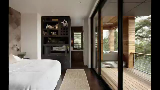

In [168]:
Predict_test('test/1.jpg')

#### --------------------------- X -------------------------------- X ---------------------------